In [33]:
import pandas as pd
import numpy as np
referendum = pd.DataFrame(pd.read_csv('data/referendum.csv', sep = ';', error_bad_lines = False))
regions = pd.DataFrame(pd.read_csv('data/regions.csv'))
departments = pd.DataFrame(pd.read_csv('data/departments.csv'))

In [18]:
regions

,id,code,name,slug
0,1,01,Guadeloupe,guadeloupe
1,2,02,Martinique,martinique
2,3,03,Guyane,guyane
3,4,04,La Réunion,la reunion
4,5,06,Mayotte,mayotte
5,6,11,Île-de-France,ile de france
6,7,24,Centre-Val de Loire,centre val de loire
7,8,27,Bourgogne-Franche-Comté,bourgogne franche comte
8,9,28,Normandie,normandie
9,10,32,Hauts-de-France,hauts de france


In [19]:
departments

,id,region_code,code,name,slug
0,1,84,01,Ain,ain
1,2,32,02,Aisne,aisne
2,3,84,03,Allier,allier
3,4,93,04,Alpes-de-Haute-Provence,alpes de haute provence
4,5,93,05,Hautes-Alpes,hautes alpes
...,...,...,...,...,...
104,105,COM,984,Terres australes et antarctiques françaises,terres australes et antarctiques francaises
105,106,COM,986,Wallis et Futuna,wallis et futuna
106,107,COM,987,Polynésie française,polynesie francaise
107,108,COM,988,Nouvelle-Calédonie,nouvelle caledonie


In [35]:
areas = pd.merge(regions, departments, left_on = 'code', right_on = 'region_code', suffixes = ('_reg', '_dep'))[['code_reg', 'name_reg', 'code_dep', 'name_dep']]

In [47]:
merge = pd.merge(referendum, areas, left_on = 'Department code', right_on = 'code_dep')

,Department code,Department name,Town code,Town name,Registered,Abstentions,Null,Choice A,Choice B,code_reg,name_reg,code_dep,name_dep
0,10,AUBE,2,Ailleville,207,36,1,71,99,44,Grand Est,10,Aube
1,10,AUBE,3,Aix-en-Othe,1768,286,30,578,874,44,Grand Est,10,Aube
2,10,AUBE,4,Allibaudières,187,60,3,31,93,44,Grand Est,10,Aube
3,10,AUBE,5,Amance,223,39,4,39,141,44,Grand Est,10,Aube
4,10,AUBE,6,Arcis-sur-Aube,1887,385,29,500,973,44,Grand Est,10,Aube
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33331,95,VAL D'OISE,676,Villers-en-Arthies,382,64,5,87,226,11,Île-de-France,95,Val-d'Oise
33332,95,VAL D'OISE,678,Villiers-Adam,595,71,4,191,329,11,Île-de-France,95,Val-d'Oise
33333,95,VAL D'OISE,680,Villiers-le-Bel,13269,4083,224,5546,3416,11,Île-de-France,95,Val-d'Oise
33334,95,VAL D'OISE,682,Villiers-le-Sec,95,11,0,40,44,11,Île-de-France,95,Val-d'Oise


In [45]:
referendum[ ~ referendum['Department code'].str.startswith('Z') ]

,Department code,Department name,Town code,Town name,Registered,Abstentions,Null,Choice A,Choice B
0,1,AIN,1,L'Abergement-Clémenciat,592,84,9,154,345
1,1,AIN,2,L'Abergement-de-Varey,215,36,5,66,108
2,1,AIN,4,Ambérieu-en-Bugey,8205,1698,126,2717,3664
3,1,AIN,5,Ambérieux-en-Dombes,1152,170,18,280,684
4,1,AIN,6,Ambléon,105,17,1,35,52
...,...,...,...,...,...,...,...,...,...
36560,95,VAL D'OISE,676,Villers-en-Arthies,382,64,5,87,226
36561,95,VAL D'OISE,678,Villiers-Adam,595,71,4,191,329
36562,95,VAL D'OISE,680,Villiers-le-Bel,13269,4083,224,5546,3416
36563,95,VAL D'OISE,682,Villiers-le-Sec,95,11,0,40,44


In [105]:
referendum_and_areas = pd.merge(referendum, areas, left_on = 'Department code', right_on = 'code_dep', how = 'left')
referendum_and_areas = referendum_and_areas[ ~ referendum_and_areas['Department code'].str.startswith('Z') ]

In [106]:
referendum_and_areas

,Department code,Department name,Town code,Town name,Registered,Abstentions,Null,Choice A,Choice B,code_reg,name_reg,code_dep,name_dep
0,1,AIN,1,L'Abergement-Clémenciat,592,84,9,154,345,NaN,NaN,NaN,NaN
1,1,AIN,2,L'Abergement-de-Varey,215,36,5,66,108,NaN,NaN,NaN,NaN
2,1,AIN,4,Ambérieu-en-Bugey,8205,1698,126,2717,3664,NaN,NaN,NaN,NaN
3,1,AIN,5,Ambérieux-en-Dombes,1152,170,18,280,684,NaN,NaN,NaN,NaN
4,1,AIN,6,Ambléon,105,17,1,35,52,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36560,95,VAL D'OISE,676,Villers-en-Arthies,382,64,5,87,226,11,Île-de-France,95,Val-d'Oise
36561,95,VAL D'OISE,678,Villiers-Adam,595,71,4,191,329,11,Île-de-France,95,Val-d'Oise
36562,95,VAL D'OISE,680,Villiers-le-Bel,13269,4083,224,5546,3416,11,Île-de-France,95,Val-d'Oise
36563,95,VAL D'OISE,682,Villiers-le-Sec,95,11,0,40,44,11,Île-de-France,95,Val-d'Oise


In [167]:
#referendum_and_areas.set_index('code_reg')
referendum_result_by_regions = referendum_and_areas.groupby(['code_reg', 'name_reg']).aggregate(sum).drop(columns = 'Town code')
referendum_result_by_regions = referendum_result_by_regions.reset_index('name_reg')
referendum_result_by_regions

,name_reg,Registered,Abstentions,Null,Choice A,Choice B
code_reg,,,,,,
11,Île-de-France,6942361,1515884,85997,2536620,2803860
24,Centre-Val de Loire,1801366,326560,28827,590890,855089
27,Bourgogne-Franche-Comté,1997925,358321,33671,668246,937687
28,Normandie,2372779,426075,35513,816972,1094219
32,Hauts-de-France,3834376,793627,55405,1290341,1695003
44,Grand Est,3660510,742840,54471,1024949,1838250
52,Pays de la Loire,2605438,412509,47677,922468,1222784
53,Bretagne,2380594,364724,36077,944052,1035741
75,Nouvelle-Aquitaine,4201774,711017,71629,1641249,1777879


In [59]:
import geopandas as gpd

* Load the geographic data with geopandas from `regions.geojson`.
    * Merge these info into `referendum_result_by_regions`.
    * Use the method `GeoDataFrame.plot` to display the result map. The results
      should display the rate of 'Choice A' over all expressed ballots.
    * Return a gpd.GeoDataFrame with a column 'ratio' containing the results.

In [170]:
coordinates = gpd.read_file('data/regions.geojson')
referendum_result_by_regions_coordinates = referendum_result_by_regions.merge(coordinates, left_on = 'code_reg', right_on = 'code').drop(columns = 'nom')

In [172]:
referendum_result_by_regions_coordinates['Choice A rate'] = referendum_result_by_regions_coordinates['Choice A'] / (referendum_result_by_regions_coordinates['Null']+referendum_result_by_regions_coordinates['Choice A'] + referendum_result_by_regions_coordinates['Choice B'])

Text(0.5, 1.0, 'Choice A rate per region in France')

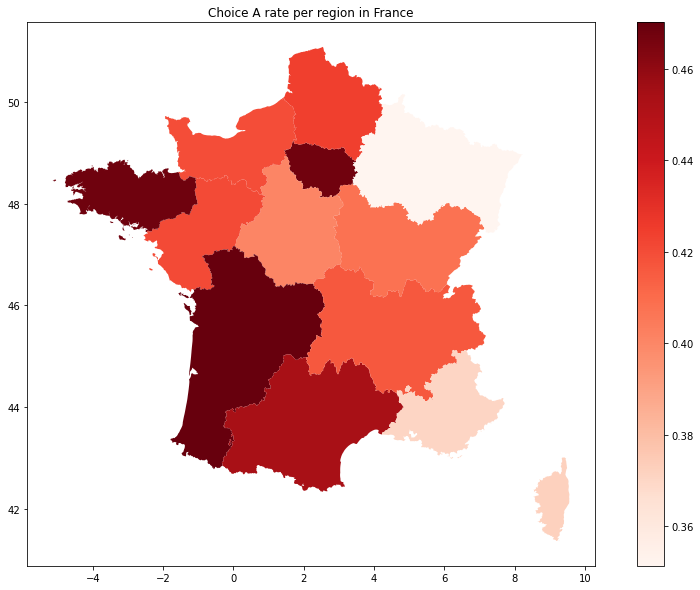

In [194]:
gpd.GeoDataFrame(referendum_result_by_regions_coordinates).plot('Choice A rate', legend = True, figsize = (15, 10), cmap = 'Reds')
plt.title('Choice A rate per region in France')